Loading the relevent data sets

In [1]:
import pandas as pd
import numpy as np
from scipy import *
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
import pandas as pd

# Assuming the file paths are correct and the CSV files are in the expected format
maternaldata = pd.read_csv('Maternal Health Risk Data Set.csv')
maternalhealthindicator = pd.read_csv('Reproductive Child-Healthcare.csv')
racialmaternaldata = pd.read_csv('IHME_USA_MMR_STATE_RACE_ETHN_1999_2019_ESTIMATES_COLLAPSED_Y2023M07D03.csv')

# Data Cleaning Steps
maternaldata.dropna(inplace=True)
maternalhealthindicator.dropna(inplace=True)
racialmaternaldata.dropna(inplace=True)

# Removing duplicates
maternaldata.drop_duplicates(inplace=True)
maternalhealthindicator.drop_duplicates(inplace=True)
racialmaternaldata.drop_duplicates(inplace=True)

# One-hot encoding the 'race group' column
# Replace 'race_group_column_name' with the actual name of your race group column
racialmaternaldata_encoded = pd.get_dummies(racialmaternaldata, columns=['race_group'])

# Dropping the 'location_name' column
# Replace 'location_name' with the actual name of your location column if different
racialmaternaldata_encoded.drop('location_name', axis=1, inplace=True)

# Display the cleaned data
print("\nMaternal Data After Cleaning:\n", maternaldata)
print("\nMaternal Health Indicator After Cleaning:\n", maternalhealthindicator)
print("\nRacial Maternal Data After Encoding and Dropping Location Name:\n", racialmaternaldata_encoded)



Maternal Data After Cleaning:
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0     25         130           80  15.0      98.0         86  high risk
1     35         140           90  13.0      98.0         70  high risk
2     29          90           70   8.0     100.0         80  high risk
3     30         140           85   7.0      98.0         70  high risk
4     35         120           60   6.1      98.0         76   low risk
..   ...         ...          ...   ...       ...        ...        ...
673   12         100           50   6.4      98.0         70   mid risk
674   15         100           60   6.0      98.0         80   low risk
703   15         100           49   7.6      98.0         77   low risk
704   12         100           50   6.0      98.0         70   mid risk
705   21         100           50   6.8      98.0         60   low risk

[452 rows x 7 columns]

Maternal Health Indicator After Cleaning:
       baseline value  accelerations 

/var/folders/gt/y1f_bvkx7zvdv6k8zq3l279m0000gn/T/ipykernel_30297/1189453705.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = maternaldata.corr()


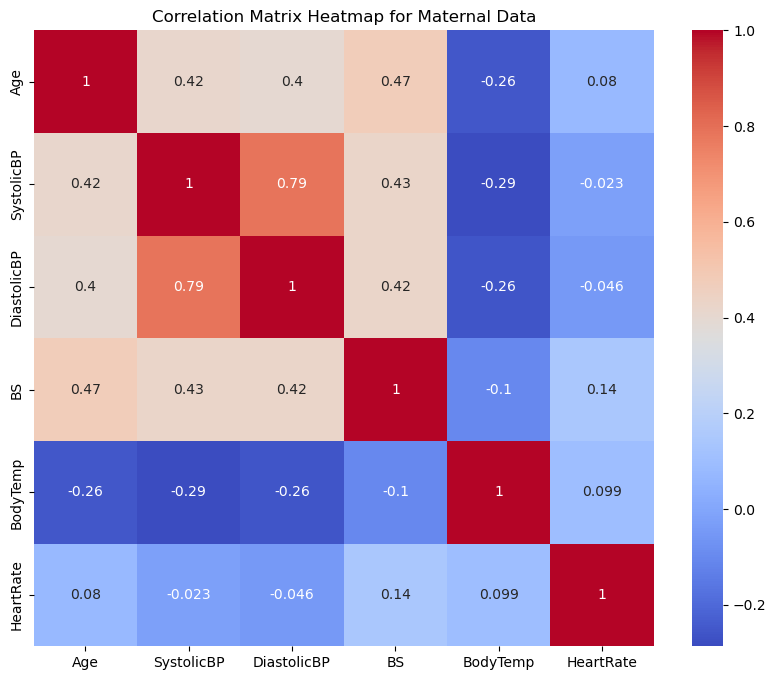

In [3]:
## visualizations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned datasets (replace the file paths with your actual file paths)
maternaldata = pd.read_csv('Maternal Health Risk Data Set.csv')
# Perform any necessary cleaning steps here

# Correlation matrix heatmap
corr_matrix = maternaldata.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for Maternal Data')
plt.show()




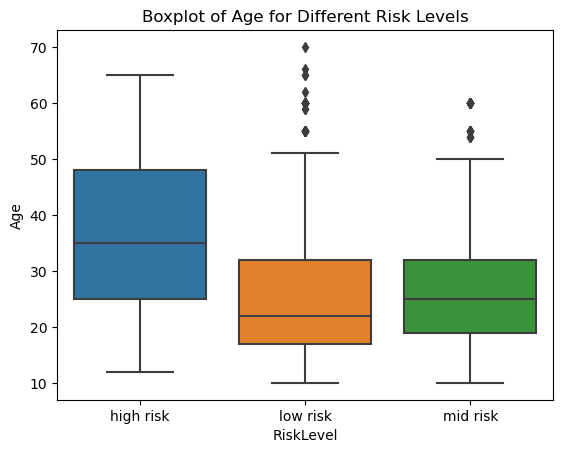

In [4]:

# Boxplot for a feature (e.g., Age) against the RiskLevel
sns.boxplot(x='RiskLevel', y='Age', data=maternaldata)
plt.title('Boxplot of Age for Different Risk Levels')
plt.show()


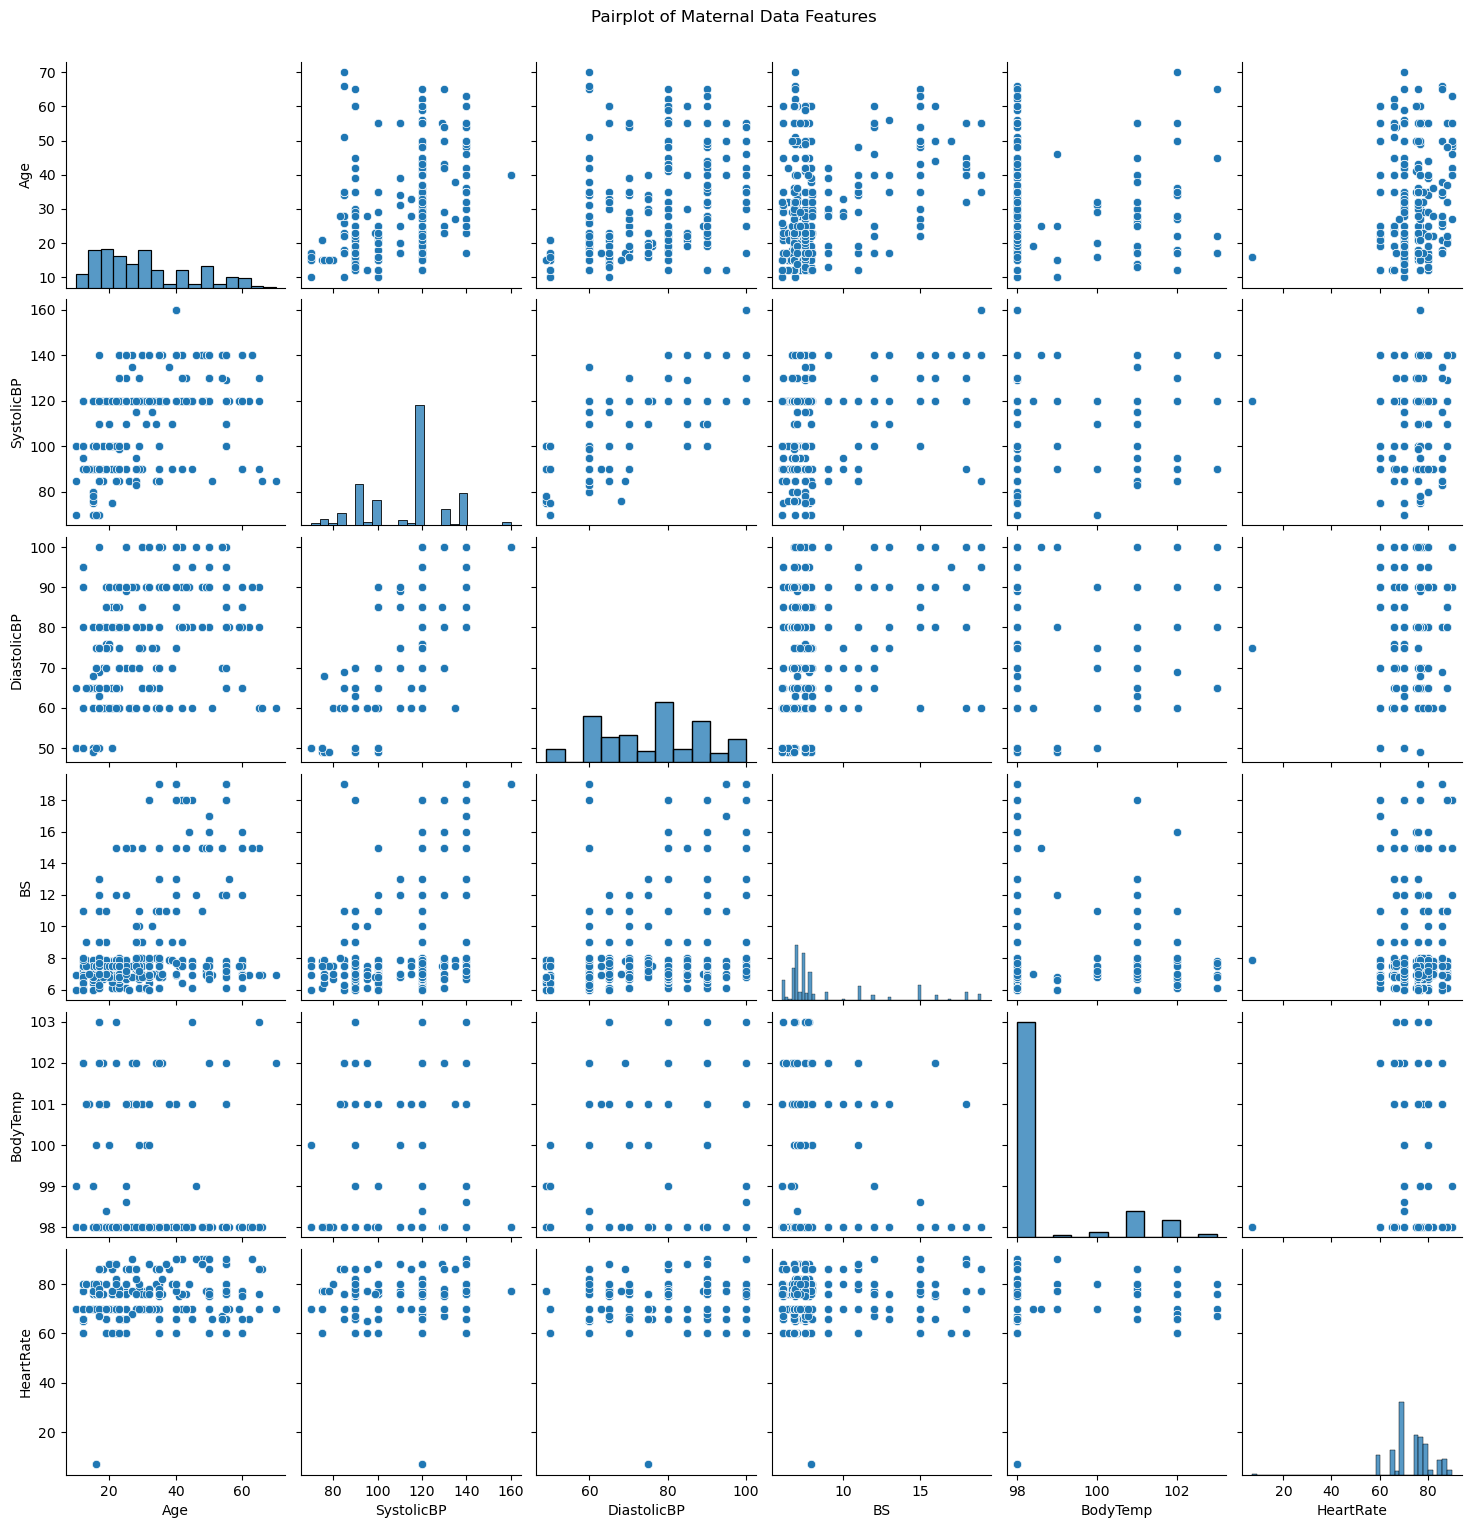

In [5]:
# Pairplot to visualize pairwise relationships
# Note: Depending on the size of your dataset, this might take a while to generate
sns.pairplot(maternaldata)
plt.suptitle('Pairplot of Maternal Data Features', y=1.02)
plt.show()


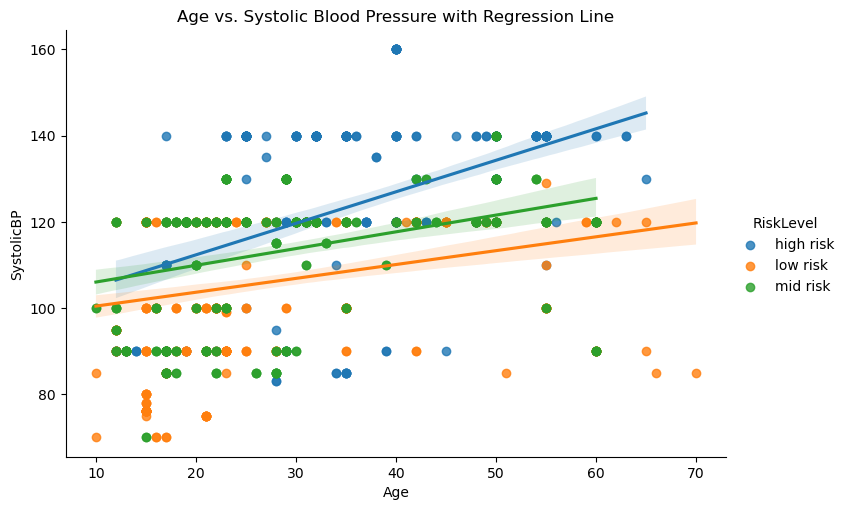

In [6]:
# Scatter plots with regression line
# Example: Age vs SystolicBP
sns.lmplot(x='Age', y='SystolicBP', hue='RiskLevel', data=maternaldata, aspect=1.5)
plt.title('Age vs. Systolic Blood Pressure with Regression Line')
plt.show()

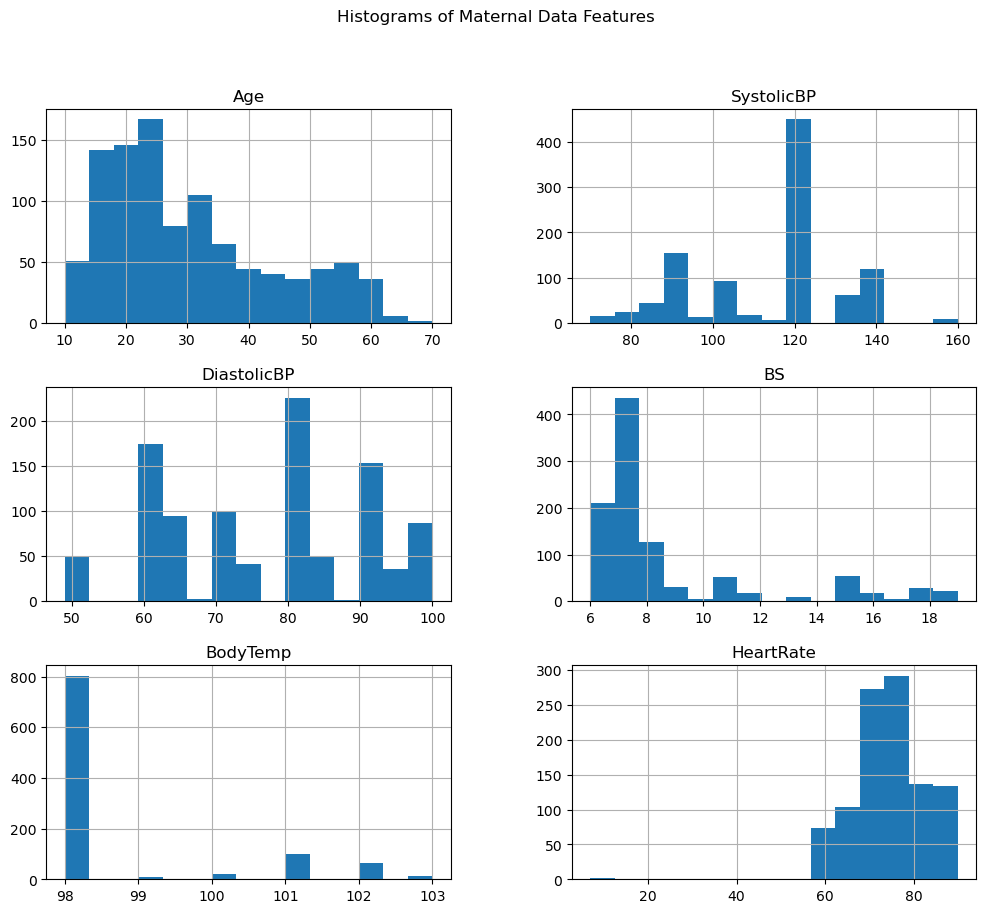

In [7]:
# Histograms for each feature
maternaldata.hist(figsize=(12, 10), bins=15)
plt.suptitle('Histograms of Maternal Data Features')
plt.show()


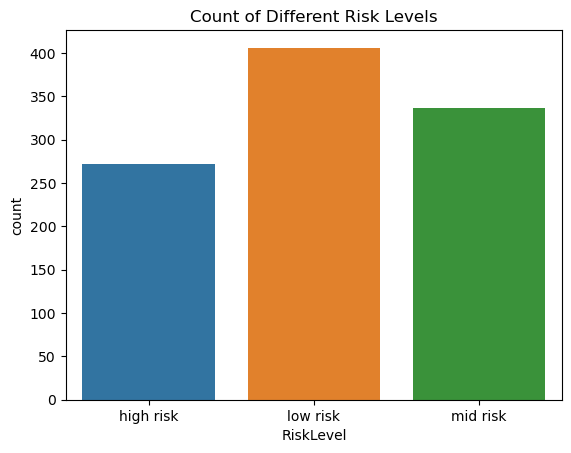

In [8]:
# Count plot for RiskLevel
sns.countplot(x='RiskLevel', data=maternaldata)
plt.title('Count of Different Risk Levels')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming maternaldata is already loaded and cleaned
# Encoding the 'RiskLevel' column
le = LabelEncoder()
maternaldata['RiskLevel'] = le.fit_transform(maternaldata['RiskLevel'])

# Splitting the dataset into features and target
X = maternaldata.drop('RiskLevel', axis=1)
y = maternaldata['RiskLevel']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.87      0.87        47
           1       0.86      0.76      0.81        80
           2       0.75      0.84      0.80        76

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.82      0.82      0.82       203



In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming race_group has been one-hot encoded and the dataset is named racialmaternaldata_encoded

# Selecting the one-hot encoded race_group columns as features
X = racialmaternaldata_encoded.filter(like='race_group_')  # or the correct one-hot encoded column names
y = racialmaternaldata_encoded['val']  # The continuous target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the regression model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


## racial data on its own is not a strong enough indicator of maternal morbidity risk, we need to
## find a way to combine this data set with others like it, and use race_group as a feature.....

R-squared: 0.5131147933511713


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (assuming it's in a CSV file)
data = pd.read_csv("Reproductive Child-Healthcare.csv")

# Split the data into features (X) and the target variable (y)
X = data.drop("fetal_health", axis=1)
y = data["fetal_health"]

# Split the data into training and testing sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, depending on the algorithm)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose a machine learning algorithm (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9463087248322147
Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       231
         2.0       0.82      0.80      0.81        40
         3.0       0.96      0.85      0.90        27

    accuracy                           0.95       298
   macro avg       0.91      0.88      0.90       298
weighted avg       0.95      0.95      0.95       298

